# MNIST Classification using Random_Forest Classifier

In [1]:
# Adding our data to the sklearn dataset location
from sklearn.datasets._base import get_data_home
get_data_home()

'C:\\Users\\dinesh\\scikit_learn_data'

## Unfortunately fetch_mldata() has been replaced in the latest version of sklearn as fetch_openml()

In [2]:
# use this code for older version sklearn(v 0.19)

# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata("MNIST original")

In [3]:
# for latest version (v 0.24 or unstable)
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

In [4]:
#importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [6]:
pixels = pd.DataFrame(x)
labels = pd.DataFrame(y)

In [7]:
pixels.loc[0].values #value of zero th element

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
labels.loc[0].values #element in position 0th

['5']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

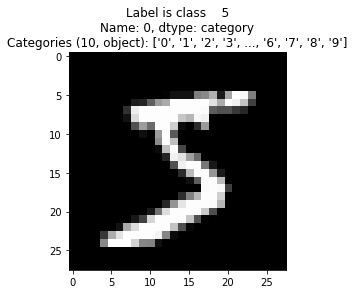

In [9]:
#visualisation
pixel = pixels.loc[0]
label = labels.loc[0]

pixel = np.array(pixel,dtype = 'uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap = 'gray')
plt.show()

In [10]:
#splitting our dataset to train and test
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0) 

In [11]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (60000, 784)
x_test (10000, 784)
y_train (60000,)
y_test (10000,)


# Training Random_Forest_classifier

In [12]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
#predicting the model
y_pred = model.predict(x_test)

## Classification Report

In [14]:
print("classification report:")
print(classification_report(y_test, y_pred))


classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       967
           1       0.98      0.99      0.98      1128
           2       0.96      0.96      0.96      1039
           3       0.96      0.96      0.96       998
           4       0.96      0.97      0.97       940
           5       0.98      0.97      0.97       890
           6       0.98      0.99      0.99       987
           7       0.97      0.96      0.96      1064
           8       0.97      0.96      0.96      1001
           9       0.95      0.95      0.95       986

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Confusion Matrix

In [15]:
print ("Confusion Report")
print(confusion_matrix(y_test, y_pred))

Confusion Report
[[ 960    0    1    0    0    1    2    1    2    0]
 [   0 1116    5    1    1    0    1    2    1    1]
 [   5    3  999    2   10    2    2    8    8    0]
 [   1    1   12  956    1    7    1   10    6    3]
 [   4    1    0    0  913    1    4    2    2   13]
 [   3    1    1   12    2  859    3    0    5    4]
 [   5    3    0    0    1    1  976    0    1    0]
 [   0    4   11    1    6    1    0 1018    4   19]
 [   1    4    6    6    5    6    2    1  957   13]
 [   5    5    1   14   11    2    3    6    3  936]]


## Cross Validation

In [16]:
#Cross validation
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
score = cross_val_score(rf, x_train, y_train)
print (np.mean(score))

0.9674666666666667


In [17]:
#predicting
y_predicted = model.predict(x_test.iloc[0].values.reshape(1,-1))
print(y_predicted)

['4']


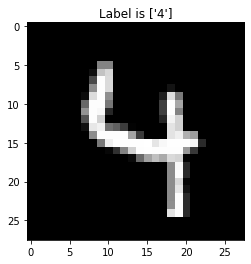

In [18]:
pixel = x_test.iloc[0].values
label = y_predicted


pixel = np.array(pixel,dtype = 'uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel,cmap = 'gray')
plt.show()

In [19]:
#predicting on test data
predict = model.predict(pixels)

In [20]:
pred = pd.Series(predict,name="pixels")
submission = pd.concat([pd.Series(range(1,70000),name = "ImageId"),pred],axis = 1)
submission.to_csv("mnist_rf.csv",index=False)